# Project 1 - Food Sales Predictions

Tijesunimi Odebode


## **Part 1 - Loading and verifying data**

Each of the following tasks will be addressed:

a. Import necessary packages

b. Load and verify data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### a. Import necessary packages

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### b. Load and verify data

In [ ]:
filename = "/content/drive/MyDrive/Coding Dojo Bootcamp/Data/sales_predictions.csv"
sales_predictions = pd.read_csv(filename)
sales_predictions.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052




---









## **Part 2 - Data Cleaning** 

Each of the following tasks will be addressed:

a. How many rows and columns?

b. What are the datatypes of each variable?

c. Are there duplicates? If so, drop any duplicates.

d. Identify missing values.

e. Decide on how to address the missing values and do it! 

f. Confirm that there are no missing values after addressing them.

g. Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent) 

h. For any numerical columns, obtain the summary statistics of each (min, max, mean)

### a. How many rows and columns?

In [ ]:
# How many rows and columns?
sales_predictions.shape

(8523, 12)

### b. What are the datatypes of each variable?

In [ ]:
# What are the datatypes of each variable?
sales_predictions.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

### c. Are there duplicates? If so, drop any duplicates.

In [ ]:
# Are there duplicates? If so, drop any duplicates.
sales_predictions.duplicated().sum()

0

- There are no duplicates.

### d. Identify missing values.

In [ ]:
# Identify missing values.
sales_predictions.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

- There are 1463 missing values in the 'Item_Weight' column.

- There are 2410 missing values in the 'Outlet_Size' column.

In [ ]:
# This shows the missing values as 'True' in the dataframe
sales_predictions_missing = sales_predictions.isna()
sales_predictions_missing

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,False,False,False,False,False,False,False,False,False,False,False,False
8519,False,False,False,False,False,False,False,False,True,False,False,False
8520,False,False,False,False,False,False,False,False,False,False,False,False
8521,False,False,False,False,False,False,False,False,False,False,False,False


### e. Decide on how to address the missing values and do it!  

The following is how I will address the problem:

i) For "Item_Weight" column, I will determine the median weight and then insert the median in the cells that have a missing value.

ii) For the "Outlet_Size" column, I will fill the cells with missing values with the most frequent size.


In [ ]:
#i)For "Item_Weight" column, determine the median weight and 
# then insert the median in the cells that have a missing value.
sales_we_med = sales_predictions['Item_Weight'].median()
sales_weight = sales_predictions.loc[:, "Item_Weight"].fillna(sales_we_med, inplace=True)

In [ ]:
#ii)For the "Outlet_Size" column,
#Count the number of each size (small, medium, High) in the column.
sales_predictions.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

- 'Medium' is the most frequent size. I will fill in 'Medium' for the missing values in the "Outlet_Size" column.

In [ ]:
#ii)For the "Outlet_Size" column,
#Fill the cells with missing values with 'Medium'
sales_predictions.loc[:, "Outlet_Size"].fillna('Medium', inplace=True) 

- For the two columns with missing values in question 'e', I used the **"single value imputation"** method to deal with the missing values.I decided not to use the **'deletion'** method because the number of missing values for each column that had a missing value was too many.

### f. Confirm that there are no missing values after addressing them.

In [ ]:
# Find the summ of missing values in each column.
sales_predictions.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

- Since all the columns have '0', this confirms that there are no missing values in the dataframe.

### g. Find and fix any inconsistent categories of data

In [ ]:
#Let's see the unique values in the 'Item_Fat_Content' column and 
# sort them alphabetically
Item_Fat_Cont = sales_predictions['Item_Fat_Content'].unique()
Item_Fat_Cont.sort()
Item_Fat_Cont

array(['LF', 'Low Fat', 'Regular', 'low fat', 'reg'], dtype=object)

- "Low Fat" is written in different ways - capitalized, lower case and even abbreviated. 'Regular' is written in two ways: 'Regular' and 'reg.'

In [ ]:
# We can make all "low fat" uppercase and 
# also have a space between 'Low' and 'Fat'
sales_predictions['Item_Fat_Content'] = sales_predictions['Item_Fat_Content'].replace(['LF','low fat'],'Low Fat')
Item_Fat_Cont = sales_predictions['Item_Fat_Content'].unique()
Item_Fat_Cont.sort()
Item_Fat_Cont

array(['Low Fat', 'Regular', 'reg'], dtype=object)

In [ ]:
# We can make all 'Regular' uppercase as thus: 'Regular'
sales_predictions['Item_Fat_Content'] = sales_predictions['Item_Fat_Content'].replace(['Regular','reg'],'Regular')
Item_Fat_Cont = sales_predictions['Item_Fat_Content'].unique()
Item_Fat_Cont.sort()
Item_Fat_Cont

array(['Low Fat', 'Regular'], dtype=object)

In [ ]:
# Let's see the unique values in the 'Item_Type' column and sort them alphabetically
Item_Ty = sales_predictions['Item_Type'].unique()
Item_Ty.sort()
Item_Ty

array(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'], dtype=object)

- It looks like there are no inconsistent categories of data in the 'Item_Type' column.

In [ ]:
# Let's see the unique values in the 'Outlet_Size' column and sort them alphabetically
Outlet_Si = sales_predictions['Outlet_Size'].unique()
Outlet_Si.sort()
Outlet_Si

array(['High', 'Medium', 'Small'], dtype=object)

- It looks like there are no inconsistent categories of data in the 'Outlet_Size' column.

In [ ]:
# Let's see the unique values in the 'Outlet_Location_Type' column and sort them alphabetically
Outlet_Loc = sales_predictions['Outlet_Location_Type'].unique()
Outlet_Loc.sort()
Outlet_Loc

array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)

- It looks like there are no inconsistent categories of data in the 'Outlet_Location_Type' column.

In [ ]:
# Let's see the unique values in the 'Outlet_Type' column and sort them alphabetically
Outlet_Ty = sales_predictions['Outlet_Type'].unique()
Outlet_Ty.sort()
Outlet_Ty

array(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'], dtype=object)

- It looks like there are no inconsistent categories of data in the 'Outlet_Type' column.

### h. For any numerical columns, obtain the summary statistics of each (min, max, mean)

In [ ]:
# For any numerical columns, obtain the summary statistics of each (min, max, mean)
sales_predictions.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


---

## **Part 3 - Exploratory Data Visualization**

Each of the following will be shown:

**a.** Histogram of the Maximum Retail Price (list price) of products.

**b.** Boxplot of the 'Item_Weight' column.

**c.** Heat map of the 'sales_predictions' dataframe.

In [ ]:
# Let's see the data again
sales_predictions.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### **a.** Histogram of the Maximum Retail Price (list price) of products.

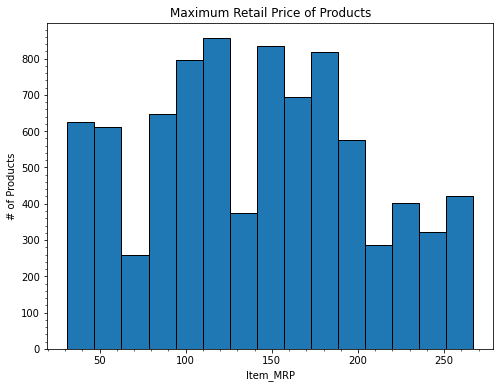

In [ ]:
# Histogram of the Maximum Retail Price (list price) of products.
plt.figure(figsize=(8,6))
# Parameter "edgecolor='black'" was adapted from: https://www.youtube.com/watch?v=XDv6T4a0RNc&list=PL-osiE80TeTvipOqomVEeZ1HRrcEvtZB_&index=6
plt.hist(sales_predictions['Item_MRP'], bins = 15, edgecolor='black')
plt.xlabel("Item_MRP")
plt.ylabel("# of Products")
plt.title('Maximum Retail Price of Products')
# "The following Code adapted from: https://stackoverflow.com/questions/9127434/how-to-create-major-and-minor-gridlines-with-different-linestyles-in-python”
plt.minorticks_on();

- Item_MRP stands for "Maximum Retail Price (list price) of the product."

- The above histogram shows the maximum retail price ranges (represented by blue-colored bins) of multiple food products and the number of products that fall in that price range. 

- It is apparent from the above histogram that the highest number of products fall in the maximum retail price range of roughly 110-125.

- It is also obvious from the above histogram that no product has a maximum retail price less than approximately 30. Also, no product has a maximum retail price greater than about 268. 

### **b.** Boxplot of the 'Item_Weight' column.

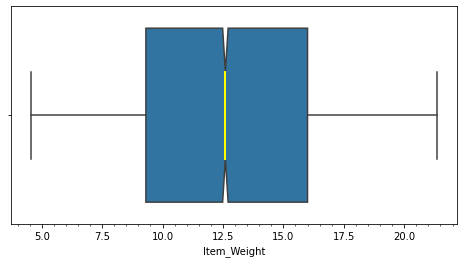

In [ ]:
# Boxplot of the 'Item_Weight' column.
plt.figure(figsize=(8,4))
sns.boxplot(data=sales_predictions, x='Item_Weight', medianprops = dict(linestyle='-', linewidth=2, color='yellow'), notch = True)
plt.minorticks_on();

- In the above boxplot, it is apparent that there are no outliers for  the 'Item_Weight' column.

- Also, the yellow-colored line in middle of the box represents the **median** for the "Item_Weight" column.This value is approximately around 12.5. We can also see that the **25th percentile** is approximately around 9.3, the **75th percentile** is approximately around 16, the **minimum** is approximately around 4.5 and the **maximum** is approximately around 21.4. These numbers match up closely with what we see in the summary of statistics table below.  

- In the table below, 25th percentile is represented by 25%, median is represented by 50%, 75th percentile is 75%, and the minimum and maximum are 'min' and 'max.'

In [ ]:
# The row with title '50%' in the table below shows the median for each column
sales_predictions.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


### **c.** Heat map of the 'sales_predictions' dataframe

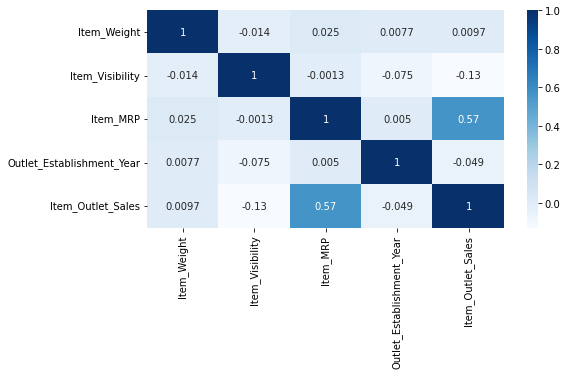

In [ ]:
# Heat map of the 'sales_predictions' dataframe
corr_salespredict = sales_predictions.corr()
plt.figure(figsize=(8,4))
sns.heatmap(corr_salespredict, cmap='Blues', annot=True);

- The above heat map shows a comparision of every column in the 'sales_predictions' dataframe against every other column.The numbers on each box are the correlation values for each comparison. Low correlation values are roughly between 0.3 and 0.5. Moderate correlation values are between 0.5 and 0.7. Strong correlation values are greater than 0.7. 

- It is obvious from the above heat map that when you compare each column against itself, you get a correlation value of 1. This is expected. Also, when 'Item_Outlet_Sales' is compared against 'Item_MRP', there is moderate positive correlation with a correlation value of 0.57. This means that the higher the maximum retail price (list price) of the product, the higher the sales of the product in the paricular store, and the lower the maximum retail price (list price) of the product, the lower the sales of the product in the paricular store.

- The correlation values in the other boxes in the above heat map are either less than +0.1(indicating almost no correlation or very weak positive correlation) or they are very weak negative correlation values. Negative correlation indicates that when one column feature goes up, the other column feature being compared with it goes down and vice versa.

---

## **Part 4 - Explanatory Data Visualization**

Each of the following tasks will be addressed:

a. Identify and address any outliers in the data set

b. Using a scatter plot, compare the 'Item_Visibility' and 'Item_Outlet_Sales' columns to see if there is any correlation between product visibility (the percentage of total display area of all products in a store allocated to the particular product) and sales of the product in the particular store.

c. Using bar charts, compare  the mean of 'Item_Outlet_Sales' column with the 'Item_Fat_Content' column to see if there is any correlation between the fat content of food products and the average sales of products in various stores.

### a. Identify and address any outliers in the data set

In [ ]:
# Let's first use the .describe() function
sales_predictions.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


- To determine the outliers in our data, I would have to use a data visualization technique. I have used boxplots. First, I will look at the above summary statistics (found using the function '.describe'), and then look at the median of each column to see if it is around halfway through all the values. If the median is around halfway all the values, then there is a chance that column does not have an outlier. Secondly, if the maximum is far away from the 75% percentile value, there is a chance that column has an outlier. I have selected columns based on the above 2 criteria stated and decided to create boxplots for each of those columns below.

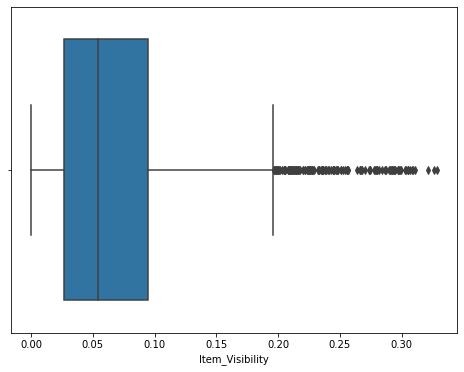

In [ ]:
# Boxplot for 'Item_Visibility' column
plt.figure(figsize=(8,6))
sns.boxplot(data=sales_predictions, x='Item_Visibility');

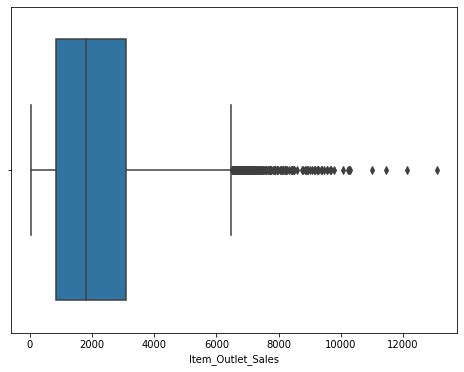

In [ ]:
# Boxplot for 'Item_Outlet_Sales' column
plt.figure(figsize=(8,6))
sns.boxplot(data=sales_predictions, x='Item_Outlet_Sales');


- It is obvious from the above boxplots that the following columns have outliers in them: 'Item_Visibility' and 'Item_Outlet_Sales.'
- I have decided to keep the outliers in the 'sales_predictions' data.I don't see a reason to believe the outliers are an error in the dataset. 

### b. Using a scatter plot, compare the 'Item_Visibility' and 'Item_Outlet_Sales' columns 

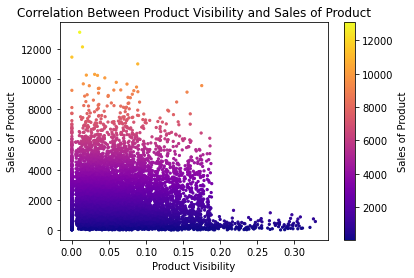

In [ ]:
# Compare the 'Item_Visibility' and 'Item_Outlet_Sales' columns
plt.scatter(sales_predictions['Item_Visibility'], 
sales_predictions['Item_Outlet_Sales'], 
c=sales_predictions['Item_Outlet_Sales'], cmap='plasma', s=5)
plt.colorbar(label='Sales of Product')
plt.title('Correlation Between Product Visibility and Sales of Product')
plt.xlabel('Product Visibility')
plt.ylabel('Sales of Product')
plt.show();

- From the above scatter plot, I don't see any correlation between product visibility (the percentage of total display area of all products in a store allocated to the particular product) and sales of product in the particular store.

### c. Using bar charts, compare the mean of 'Item_Outlet_Sales' column with the 'Item_Fat_Content' column 

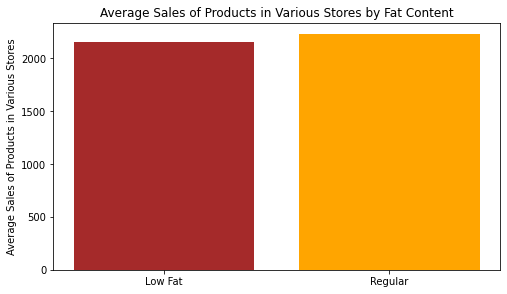

In [ ]:
# Compare the mean of 'Item_Outlet_Sales' column with the Fat Content (column 'Item_Fat_Content') 
fig = plt.figure(figsize=(8,10))
ax1 = fig.add_subplot(211)
fat_content = sales_predictions.groupby('Item_Fat_Content')['Item_Outlet_Sales'].mean()
ax1.bar(fat_content.index, fat_content, color=['brown','orange'])
ax1.set_ylabel('Average Sales of Products in Various Stores')
ax1.set_title('Average Sales of Products in Various Stores by Fat Content');

- From the above bar chart, it looks like the average sales of products in various stores is higher for food products with regular fat content than food products with low fat content.

---

## **Part 5 - Preprocessing for Machine Learning**

In this section, the sales prediction data will be reloaded so that we can do some preprocessing before machine learning. Even though we had filled missing values in Part 2, we will fill them again a different way. 

The following tasks will be addressed:

- Identify the target (X) and features (y): Assign the "Item_Outlet_Sales" column as the target and the rest of the relevant variables as the features matrix.

- Perform a train test split 

- Create a pre processing pipeline to prepare the dataset for Machine Learning

### a. Import Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

### b. Load the Data

In [ ]:
filename = "/content/drive/MyDrive/Coding Dojo Bootcamp/Data/sales_predictions.csv"
sales_predictions = pd.read_csv(filename)
sales_predictions.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### c. Explore the data

In [ ]:
sales_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


- As seen above, there are two columns with missing data. The columns are '**Item_Weight**' and '**Outlet_Size**.'

### d. Identify each feature as numerical, ordinal, or nominal.

**Numerical features:** 'Item_Weight', 'Item_Visibility', 'Item_MRP'

**Nominal features:** 'Item_Identifier', 'Item_Type', 'Outlet_Identifier', 'Outlet_Type'

**Ordinal features:** 'Item_Fat_Content', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type'

### e. Ordinal Encoding

We will ordinal encode all ordinal features

In [ ]:
# Let's see the unique values in the 'Item_Fat_Content' column 
sales_predictions['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

- We see that there are some inconsistent values. "Low Fat" is written in different ways - capitalized, lower case and even abbreviated. 'Regular' is written in two ways: 'Regular' and 'reg.' We will correct those in the same step that we ordinal encode this column

In [ ]:
# Ordinal Encode 'Item_Fat_Content'
replacement_dictionary = {'Regular':1, 'reg':1, 'Low Fat':0, 'LF':0, 
                          'low fat':0}
sales_predictions['Item_Fat_Content'].replace(replacement_dictionary, 
                                              inplace=True)
sales_predictions['Item_Fat_Content'].value_counts()

0    5517
1    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
# Let's see the unique values in the 'Outlet_Establishment_Year' column 
sales_predictions['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [ ]:
# Ordinal Encode 'Outlet_Establishment_Year'
replacement_dictionary = {2009:8, 2007:7, 2004:6, 2002:5, 1999:4, 1998:3, 
                          1997:2, 1987:1, 1985:0}
sales_predictions['Outlet_Establishment_Year'].replace(replacement_dictionary,
                                                       inplace=True)
sales_predictions['Outlet_Establishment_Year'].value_counts()

0    1463
1     932
4     930
2     930
6     930
5     929
8     928
7     926
3     555
Name: Outlet_Establishment_Year, dtype: int64

In [ ]:
# Let's see the unique values in the 'Outlet_Size' column 
sales_predictions['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
# Ordinal Encode 'Outlet_Size'
replacement_dictionary = {'High':2, 'Medium':1, 'Small':0}
sales_predictions['Outlet_Size'].replace(replacement_dictionary, inplace=True)
sales_predictions['Outlet_Size'].value_counts()

1.0    2793
0.0    2388
2.0     932
Name: Outlet_Size, dtype: int64

In [ ]:
# Let's see the unique values in the 'Outlet_Location_Type' column 
sales_predictions['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [ ]:
# Ordinal Encode 'Outlet_Location_Type'
replacement_dictionary = {'Tier 3':2, 'Tier 2':1, 'Tier 1':0}
sales_predictions['Outlet_Location_Type'].replace(replacement_dictionary, inplace=True)
sales_predictions['Outlet_Location_Type'].value_counts()

2    3350
1    2785
0    2388
Name: Outlet_Location_Type, dtype: int64

### f. Validation Split

In [ ]:
X = sales_predictions.drop(columns=['Item_Outlet_Sales'])
y = sales_predictions['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

### g. Instantiate Column Selectors

In [ ]:
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

### h. Instantiate Transformers.

We will be using 3 different transformers: SimpleImputer, StandardScaler, and OneHotEncoder. There will be one SimpleImputer with one imputation strategy: ‘median’ strategy for numeric columns. The only categorical column with missing value has been ordinal encoded, so we won't need to use SimpleImputer for that column. We will one-hot encode the nominal categorical feature as well.

In [ ]:
# Imputers
median_imputer = SimpleImputer(strategy='median')
# Scaler
scaler = StandardScaler()
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

### i. Instantiate Pipelines

We will be using ONE pipeline for numeric data.

In [ ]:
# Numeric pipeline
numeric_pipe = make_pipeline(median_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

### j. Instantiate ColumnTransformer

In [ ]:
# Tuples for Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (ohe, cat_selector)
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fbfff493210>),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fbfff493510>)])

### k. Fit the ColumnTransformer on the training data and transform both training and testing data

In [ ]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fbfff493210>),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fbfff493510>)])

In [ ]:
# transform training and testing data
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

### l. Inspect the Result

In [ ]:
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (6392, 1587)




array([[ 0.82748547, -0.7403206 , -0.71277507, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.56664432,  1.35076614, -1.29105225, ...,  0.        ,
         1.        ,  0.        ],
       [-0.12102782,  1.35076614,  1.81331864, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.12389588, -0.7403206 , -0.92052713, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.77599877, -0.7403206 , -0.2277552 , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82748547, -0.7403206 , -0.95867683, ...,  1.        ,
         0.        ,  0.        ]])

- From the above, we see that there are no missing data, all data are of type float64, and there are 1587 columns now.

---

## **Part 6 - Regression Models**

The following tasks will be addressed:

a. Build a linear regression model to predict sales.

- Evaluate the performance of the model based on R^2.

- Evaluate the performance of the model based on RMSE.

b. Build a regression tree model to predict sales.

- Compare the performance of the model based on R^2.

- Compare the performance of the model based on RMSE. 

c. Build a baseline model

- Compare linear regression and regression tree models to baseline model

d. Determine which model to implement.



### **a. Linear Regression Model**



Step 1: Import the model

In [ ]:
from sklearn.linear_model import LinearRegression

Step 2: Make an instance of the Model

In [ ]:
# Make a linear regression instance
reg = LinearRegression()

Step 3: Train the model on the training data. 

In [ ]:
reg.fit(X_train_processed, y_train)

LinearRegression()

Step 4: Evaluate the performance of the model based on R^2.

In [ ]:
train_score = reg.score(X_train_processed, y_train)
test_score = reg.score(X_test_processed, y_test)
print(train_score)
print(test_score)

0.6716981570817803
-5.5000759685927565e+17


- The linear regression model has a much higher R^2 score on the training data (R^2 = 0.672) than it does on the test data (R^2 = -5.500e+17). The model did poorly on the test data. This is an indication that the model is overfit.

Step 5: Predict the target values for the training set and the test test.

In [ ]:
# To obtain the predictions of the train set
train_preds = reg.predict(X_train_processed)
# To obtain the predictions of the test set
test_preds = reg.predict(X_test_processed)

Step 6: Evaluate the performance of the model based on RMSE.

In [ ]:
from sklearn.metrics import mean_squared_error
rmse_train = np.sqrt(mean_squared_error(y_train, train_preds))
rmse_test = np.sqrt(mean_squared_error(y_test, test_preds))
print(rmse_train)
print(rmse_test)

985.6950653376061
1231851641982.8567


- The root mean squared error on our training set was 985.695 and the root mean squared error on our test set was 1231851641982.857. These errors are too large. However, the training set had a much smaller error than the test set. This is another indication that our model is overfit.

Relative to the range of values our target (Item_Outlet_Sales) falls in, we can determine if the RMSE values are bad. Let's see the minimum and maximum values for the "Item_Outlet_Sales" column.

In [ ]:
# Let's first use the .describe() function
sales_predictions.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000,6113.000000,8523.000000,8523.000000
mean,12.857645,0.352693,0.066132,140.992782,3.790684,0.761819,1.112871,2181.288914
std,4.643456,0.477836,0.051598,62.275067,2.730322,0.697463,0.812757,1706.499616
min,4.555000,0.000000,0.000000,31.290000,0.000000,0.000000,0.000000,33.290000
25%,8.773750,0.000000,0.026989,93.826500,1.000000,0.000000,0.000000,834.247400
50%,12.600000,0.000000,0.053931,143.012800,4.000000,1.000000,1.000000,1794.331000
75%,16.850000,1.000000,0.094585,185.643700,6.000000,1.000000,2.000000,3101.296400
max,21.350000,1.000000,0.328391,266.888400,8.000000,2.000000,2.000000,13086.964800


The above table shows that the minimum "Item_Outlet_Sales" value is 33.290 and the maximum value is 13086.965. We can find a normalized RMSE to see whether our RMSE values are good (This idea was adapted from "https://www.statology.org/what-is-a-good-rmse/"). This will produce a value between 0 and 1. Values closer to 0 are considered better fitting models.

In [ ]:
# Normalized RMSE = RMSE / (max value – min value)
#Let's find the normalized RMSE for the training set
985.695/(13086.965 - 33.290)

0.0755109193388069

In [ ]:
#Let's find the normalized RMSE for the testing set
1231851641982.857/(13086.965 - 33.290)

94368186.88858555

- It is obviouse from the above that the normalized RMSE for the training data is not too bad considering it is close to 0. However, the normalized RMSE for the testing data is way too large and also much greater than 1. This confirms that our model did not perform well on the testing data and is overfit.


### **b. Simple Regression Tree Model**

Step 1: Import the model

In [ ]:
from sklearn.tree import DecisionTreeRegressor

Step 2: Make an instance of the Model

In [ ]:
dec_tree = DecisionTreeRegressor(random_state = 42)

Step 3: Train the model on the training data.

In [ ]:
dec_tree.fit(X_train_processed, y_train)

DecisionTreeRegressor(random_state=42)

Step 4: Evaluate the performance of the model based on R^2.

In [ ]:
train_score = dec_tree.score(X_train_processed, y_train)
test_score = dec_tree.score(X_test_processed, y_test)
print(train_score)
print(test_score)

1.0
0.2231732209457421


- The simple regression tree model has a much higher R^2 score on the training data (R^2 = 1.0) than it does on the test data (R^2 = 0.223). The model did poorly on the test data. This is an indication that the model is overfit.

Step 5: Tune the Model

In [ ]:
# Looking at options for tuning this model
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

- As seen in the output above, there are many options for tuning a decision tree regressor. For this project, we will tune the depth of our tree. As seen in the output above, the depth of our default tree was 35. We will confirm this below. 

In [ ]:
# What was the depth of our default tree?
dec_tree.get_depth()

60

Let's try a max_depth of 1 to see how changing this parameter affects our model.

In [ ]:
# Let's go extreme and set our max depth to 1
dec_tree_1 = DecisionTreeRegressor(max_depth = 1, random_state = 42)
dec_tree_1.fit(X_train_processed, y_train)
train_1_score = dec_tree_1.score(X_train_processed, y_train)
test_1_score = dec_tree_1.score(X_test_processed, y_test)
print(train_1_score)
print(test_1_score)

0.23779715896629305
0.2296825886952033


- As seen from the output above, our scores on both the training and test sets are much lower. This indicates that with a max depth of 1, our model is underfit.

Let's try something in between 1 and 35. What are the results with a max depth of 17?

In [ ]:
dec_tree_17 = DecisionTreeRegressor(max_depth = 17, random_state = 42)
dec_tree_17.fit(X_train_processed, y_train)
train_17_score = dec_tree_17.score(X_train_processed, y_train)
test_17_score = dec_tree_17.score(X_test_processed, y_test)
print(train_17_score)
print(test_17_score)

0.7678364706372744
0.4539681449843589


- Using max depth of 17 is better than a max depth of 2, and does slightly better on the test set than our default parameters. However, the score on the training set is still much higher than the testing set.

Let's try a function that would help us see which max depth gives the best R^2 score.


In [ ]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 35)) # will try every value between 1 and 35
# List to store the score for each value of max_depth:
r2 = []
for depth in max_depth_range:
    dec_tree = DecisionTreeRegressor(max_depth = depth, 
                             random_state = 42)
    dec_tree.fit(X_train_processed, y_train)
    score = dec_tree.score(X_test_processed, y_test)
    r2.append(score)

Let's visualize which max_depth leads to the highest R^2 score.

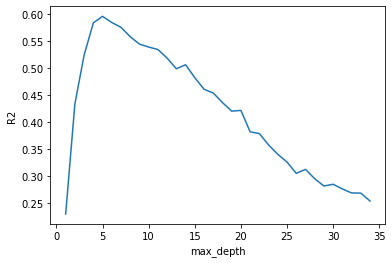

In [ ]:
# Visualize which max_depth leads to the highest R^2 score
import matplotlib.pyplot as plt
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('R2');

- From the image above, it looks like the best score for the model is when the parameter max_depth is around 6.

In [ ]:
# Let's run the model with our optimized value for max_depth
dec_tree_6 = DecisionTreeRegressor(max_depth = 6, random_state = 42)
dec_tree_6.fit(X_train_processed, y_train)
train_6_score = dec_tree_6.score(X_train_processed, y_train)
test_6_score = dec_tree_6.score(X_test_processed, y_test)
print(train_6_score)
print(test_6_score)

0.6157022844525739
0.5846155162322847


- The training and test results have moved closer to each other. This is a sign that we have reduced overfitting. The testing score has improved as well. 

Step 5: Predict the target values for the training set and the test test.

In [ ]:
traindec_preds = dec_tree.predict(X_train_processed)
testdec_preds = dec_tree.predict(X_test_processed)

Step 6: Evaluate the performance of the model based on RMSE.

In [ ]:
rmse_dec_train = np.sqrt(mean_squared_error(y_train, traindec_preds))
rmse_dec_test = np.sqrt(mean_squared_error(y_test, testdec_preds))
print(rmse_dec_train)
print(rmse_dec_test)

325.00478130713174
1434.896277371635


- The RMSE values are still high. However, relative to the range of values our target (Item_Outlet_Sales) falls in, the RMSE values are not too bad. Let's see the minimum and maximum values for the "Item_Outlet_Sales" column.

In [ ]:
# Let's first use the .describe() function
sales_predictions.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000,6113.000000,8523.000000,8523.000000
mean,12.857645,0.352693,0.066132,140.992782,3.790684,0.761819,1.112871,2181.288914
std,4.643456,0.477836,0.051598,62.275067,2.730322,0.697463,0.812757,1706.499616
min,4.555000,0.000000,0.000000,31.290000,0.000000,0.000000,0.000000,33.290000
25%,8.773750,0.000000,0.026989,93.826500,1.000000,0.000000,0.000000,834.247400
50%,12.600000,0.000000,0.053931,143.012800,4.000000,1.000000,1.000000,1794.331000
75%,16.850000,1.000000,0.094585,185.643700,6.000000,1.000000,2.000000,3101.296400
max,21.350000,1.000000,0.328391,266.888400,8.000000,2.000000,2.000000,13086.964800


- The above table show that the minimum "Item_Outlet_Sales" value is 33.290 and the maximum value is 13086.965. We can find a normalized RMSE to see whether our RMSE values are good (This idea was adapted from "https://www.statology.org/what-is-a-good-rmse/"). This will produce a value between 0 and 1. Values closer to 0 are considered better fitting models.

In [ ]:
# Normalized RMSE = RMSE / (max value – min value)
#Let's find the normalized RMSE for the training set
325.004/(13086.965 - 33.290)

0.02489750970512136

In [ ]:
#Let's find the normalized RMSE for the testing set
1434.896/(13086.965 - 33.290)

0.10992276121475371

- From the above outputs, we can tell from the normalized RMSE that the RMSE for the training data was good. However, since the normalized RMSE for the testing data was much higher than the traning data, this model is still overfit.

Let's try predicting target values for the training set and the test test based on the tuned model with the optimized max_depth of 6.

In [ ]:
traindec6_preds = dec_tree_6.predict(X_train_processed)
testdec6_preds = dec_tree_6.predict(X_test_processed)

Let's calculate the new RMSE values based on this tuned model.

In [ ]:
# RMSE of tuned model with max_depth of 6
rmse_dec6_train = np.sqrt(mean_squared_error(y_train, traindec6_preds))
rmse_dec6_test = np.sqrt(mean_squared_error(y_test, testdec6_preds))
print(rmse_dec6_train)
print(rmse_dec6_test)

1066.4483421682248
1070.5308759780908


- From the above output, we can see that the RMSE values for both the training and test sets are now closer to each other. This is a sign that we have reduced overfitting.

We will now find the normalized RMSE values based on the RMSE values of the optimized model.

In [ ]:
#Let's find the normalized RMSE for the training set
1066.448/(13086.965 - 33.290)

0.0816971465889874

In [ ]:
#Let's find the normalized RMSE for the testing set
1070.531/(13086.965 - 33.290)

0.08200993206893845

- The normalized RMSE values for both the training and test sets are close to each other (a sign that we have reduced overfitting). Also, the normalized RMSE for the testing set is less in the optimized model, which is what we want as well.

Let's compare the R^2 and RMSE values of our models to the baseline model

### **c. Baseline Model**

In [ ]:
from sklearn.dummy import DummyRegressor
# # instantiate a baseline model using the 'mean' strategy
dummy = DummyRegressor(strategy='mean')
# # put your ColumnTransformer and the baseline model into a pipeline

# base_pipe = make_pipeline(transformer, dummy)
# # fit your pipe onto the training data
# base_pipe.fit(X_train, y_train)

In [ ]:
dummy.fit(X_train_processed, y_train)

DummyRegressor()

In [ ]:
traindum_score = dummy.score(X_train_processed, y_train)
testdum_score = dummy.score(X_test_processed, y_test)
print(traindum_score)
print(testdum_score)

0.0
-0.004772483978719766


Predict the target values for the training set and the test test for the baseline model.

In [ ]:
# To obtain the predictions of the train set
traindum_preds = dummy.predict(X_train_processed)
# To obtain the predictions of the test set
testdum_preds = dummy.predict(X_test_processed)

Evaluate the performance of the baseline model based on RMSE.

In [ ]:
from sklearn.metrics import mean_squared_error
rmse_traindum = np.sqrt(mean_squared_error(y_train, traindum_preds))
rmse_testdum = np.sqrt(mean_squared_error(y_test, testdum_preds))
print(rmse_traindum)
print(rmse_testdum)

1720.306863477141
1664.9758144520788


### **d. Determine which model to implement.**

- The optimized (max_depth = 6) simple regression tree model seems to have worked better than the linear regression model. This is because the R^2 and RMSE values indicated less overfitting in the optimized simple regression tree model. Also, the optimized simple regression tree model seems to perform better on the test set. The following are the results for each model:


 |Linear Regression Model    | *Training Set* | *Testing Set*|
|----- | ----- | ----- |
| R^2 | 0.672 | -5.500e+17 |
| RMSE | 985.695 | 1231851641982.857 |



Optimized Simple Regression Tree Model    | *Training Set* | *Testing Set*
----- | ----- | -----
R^2 | 0.616 | 0.585
RMSE | 1066.448 | 1070.531

- We can see from the above results that there is less overfitting in the optimized simple regression tree model. This is because the R^2 values of the training and testing sets are closer to each other. Also, the RMSE values of the training and testing sets of the optimized simple regression tree model are closer to each other.

- Finally, the optimized simple regression tree model outperformed the baseline model. The linear regression model underperformed the baseline model.

- As a result of all of the above, I will implement the optimized simple regression tree model.

